<a href="https://colab.research.google.com/github/santoshrsarangi/tensorflow/blob/main/tensorflow/computer-vision/7%20Visualising_intermediate_activations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [6]:
ls -lart

total 11924
drwxr-xr-x 4 root root    4096 Sep 14 13:43 .config/
drwxr-xr-x 1 root root    4096 Sep 14 13:44 sample_data/
drwxr-xr-x 1 root root    4096 Sep 20 16:12 ../
-rw-r--r-- 1 root root 7996440 Sep 20 16:16 cats_vs_dogs_with_data_aug3.keras
drwxr-xr-x 1 root root    4096 Sep 20 16:16 ./
-rw-r--r-- 1 root root 4194304 Sep 20 16:17 cats_vs_dogs_with_data_aug2.keras


In [8]:
model = keras.models.load_model("cats_vs_dogs_with_data_aug2.keras")

In [10]:
model.summary()

Model: "CnDModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 180, 180, 3)]     0         
                                                                 
 RF (RandomFlip)             (None, 180, 180, 3)       0         
                                                                 
 RR (RandomRotation)         (None, 180, 180, 3)       0         
                                                                 
 RZ (RandomZoom)             (None, 180, 180, 3)       0         
                                                                 
 Rescaling_Layer (Rescaling)  (None, 180, 180, 3)      0         
                                                                 
 Conv2D1 (Conv2D)            (None, 178, 178, 32)      896       
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 89, 89, 32)        0  

In [13]:
import numpy as np
import matplotlib.pyplot as plt


In [18]:
image = keras.utils.load_img("cat.jpg", target_size=(180,180,3))

In [20]:
image_as_np_array = keras.utils.img_to_array(image)

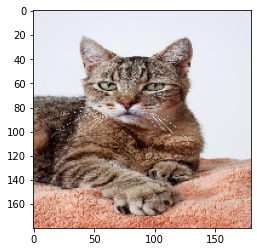

In [34]:
plt.imshow(image_as_np_array.astype("uint8"))
plt.show()

In [27]:
image_as_np_array.shape

(180, 180, 3)

In [28]:
input_image = np.expand_dims(image_as_np_array, axis=0)

In [29]:
input_image.shape

(1, 180, 180, 3)

In [35]:
from tensorflow.keras import layers

In [36]:
all_layers = []
layer_names = []

In [37]:
for layer in model.layers:

  if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
    all_layers.append(layer.output)
    layer_names.append(layer.name)

In [38]:
activation_model = keras.Model(inputs=model.input, outputs=all_layers)

In [40]:
for name in layer_names:
  print(name)

Conv2D1
MaxPool1
Conv2D2
MaxPool2
Conv2D3
MaxPool3
Conv2D4
MaxPool4
Conv2D5


In [39]:
activation_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 180, 180, 3)]     0         
                                                                 
 RF (RandomFlip)             (None, 180, 180, 3)       0         
                                                                 
 RR (RandomRotation)         (None, 180, 180, 3)       0         
                                                                 
 RZ (RandomZoom)             (None, 180, 180, 3)       0         
                                                                 
 Rescaling_Layer (Rescaling)  (None, 180, 180, 3)      0         
                                                                 
 Conv2D1 (Conv2D)            (None, 178, 178, 32)      896       
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 89, 89, 32)        0     

In [45]:
activations = activation_model.predict(input_image)

In [56]:
activations[0].shape

(1, 178, 178, 32)